Uczenie maszynowe

Zasady ćwiczeń:
    1. Format rozwiązania: notebook (.ipynb). Widzimy kod, rozwiązanie, a jak trzeba grafikę.
    2. Wykonane skrypty wkładamy do Zadania na platformie Moodle (czas jest ograniczony).
    3. Na zajęciach należy zreferować rozwiązania (proszę, żeby nie było sytuacji, że nikt nie referuje).


Lab: 6 Klasyfikacja

Jeśli metodykę któregoś z etapów pracy można uogólnić, taki etap proszę zakodować w postaci metody
(z ew. parametrami).

Proszę opracować paradygmat uczenia:
    1. Klasyfikator k-NN (k-Nearest Neighbors).
    2. Klasyfikator Drzewo Decyzyjne.
    3. Regresja Logistyczna
    4. Naiwny Bayes
    5. LDA (Linear Discriminant Analysis)
    6. SVM (Support Vector Machine)
    7. MLP (Multi Layer Perceptron)

W ramach danego paradygmatu uczenia przedstawić:
    • podstawy teoretyczne (krótko)
    • metody/typy
    • parametry, regularyzację, optymalizację
    • implementację (własną lub biblioteczną): uczenie, predykcja (testowanie)
    • typowe metryki wraz z metodami ich wyliczania
    • wizualizację: zbioru/modelu
    • uczenie na wybranym zbiorze danych (przy wielu metodach w ramach paradygmatu, na różnych zbiorach danych)
Najważniejszą częścią wykonanej pracy jest prezentacja i dyskusja na ćwiczeniach.


Przykładowe archiwa danych:
www.kaggle.com/datasets
archive.ics.uci.edu/ml
datasetsearch.research.google.com


In [1]:
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
plt.style.use('seaborn-whitegrid')

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 15),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

## 1. k-NN (k-Nearest Neighbors)

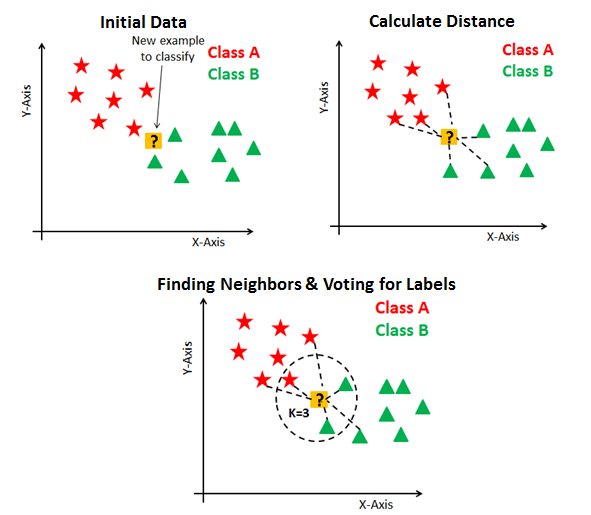

In [2]:
# Assigning features and label variables
# First Feature
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny',
'Rainy','Sunny','Overcast','Overcast','Rainy']
# Second Feature
temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

# Label or target varible
play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
weather_encoded=le.fit_transform(weather)
temp_encoded=le.fit_transform(temp)
label=le.fit_transform(play)
#combinig weather and temp into single listof tuples
features=list(zip(weather_encoded,temp_encoded))
print(f'Weather feature encoded: {weather_encoded}\nTemperature feature encoded: {temp_encoded}\nLabel encoded: {label}\nFeatures zipped (as points): {features}')

Weather feature encoded: [2 2 0 1 1 1 0 2 2 1 2 0 0 1]
Temperature feature encoded: [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
Label encoded: [0 0 1 1 1 0 1 0 1 1 1 1 1 0]
Features zipped (as points): [(2, 1), (2, 1), (0, 1), (1, 2), (1, 0), (1, 0), (0, 0), (2, 2), (2, 0), (1, 2), (2, 2), (0, 2), (0, 1), (1, 2)]


In [3]:
model = KNeighborsClassifier(n_neighbors=3)
# Train the model using the training sets
model.fit(features,label)
#Predict Output
x = 0
y = 2
predicted= model.predict([[x ,y]]) # 0:Overcast, 2:Mild
print(f'Prediction for point ({x},{y}) = {predicted}')

Prediction for point (0,2) = [1]


#### In the above code we transformed features into numbers and placed them on a 2D plot. Then we classified the label at point (0, 2) and we get the prediction of 1, which means that we 'play' when the weather is overcast and temperature is mild. The result itself is 'play', because out of 3 neighbors of point (0,2), 2 of them are red (which means 'play') 

[]

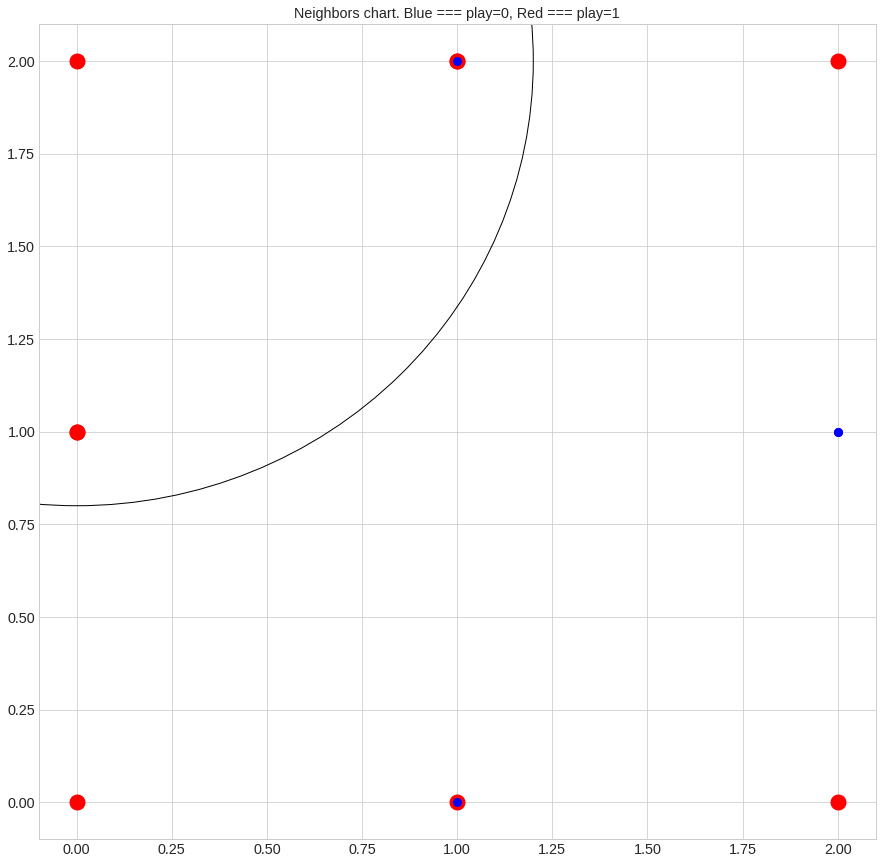

In [4]:
for i in range(0, len(label)):
    if label[i] == 1:
        plt.scatter(weather_encoded[i], temp_encoded[i], c='r', linewidth=10)
    else:
        plt.scatter(weather_encoded[i], temp_encoded[i], c='b', linewidth=3)

plt.title('Neighbors chart. Blue === play=0, Red === play=1')
circle = plt.Circle((0, 2), 1.2, fill=False)
plt.gcf().gca().add_artist(circle)
plt.plot()

### k-NN with multiple labels

In [5]:
wine = datasets.load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [6]:
print(f'Classes = {wine.target_names}')
print(f'Targets = {wine.target}')
# df['class'] = wine.target

Classes = ['class_0' 'class_1' 'class_2']
Targets = [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [7]:
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3) # 70% training and 30% test

neighbors = 3
knn = KNeighborsClassifier(n_neighbors=neighbors)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(f'Accuracy for {neighbors} neighbors: {metrics.accuracy_score(y_test, y_pred)}')

neighbors = 7
knn = KNeighborsClassifier(n_neighbors=neighbors)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(f'Accuracy for {neighbors} neighbors: {metrics.accuracy_score(y_test, y_pred)}')

neighbors = 9
knn = KNeighborsClassifier(n_neighbors=neighbors)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(f'Accuracy for {neighbors} neighbors: {metrics.accuracy_score(y_test, y_pred)}')

Accuracy for 3 neighbors: 0.5740740740740741
Accuracy for 7 neighbors: 0.6851851851851852
Accuracy for 9 neighbors: 0.6666666666666666


#### We can improve the classification by normalizing data to fit into range [0,1]

In [8]:
min_max_scaler = preprocessing.MinMaxScaler()
wine_minmax = min_max_scaler.fit_transform(wine.data)

X_train, X_test, y_train, y_test = train_test_split(wine_minmax, wine.target, test_size=0.3) # 70% training and 30% test

neighbors = 3
knn = KNeighborsClassifier(n_neighbors=neighbors)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(f'Accuracy for {neighbors} neighbors: {metrics.accuracy_score(y_test, y_pred)}')

neighbors = 7
knn = KNeighborsClassifier(n_neighbors=neighbors)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(f'Accuracy for {neighbors} neighbors: {metrics.accuracy_score(y_test, y_pred)}')

neighbors = 9
knn = KNeighborsClassifier(n_neighbors=neighbors)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(f'Accuracy for {neighbors} neighbors: {metrics.accuracy_score(y_test, y_pred)}')

Accuracy for 3 neighbors: 0.9629629629629629
Accuracy for 7 neighbors: 0.9629629629629629
Accuracy for 9 neighbors: 0.9629629629629629


#### Now let's classify wines using only 2 characteristics

Accuracy for 3 neighbors: 0.6296296296296297
Accuracy for 7 neighbors: 0.7037037037037037
Accuracy for 9 neighbors: 0.7037037037037037


[]

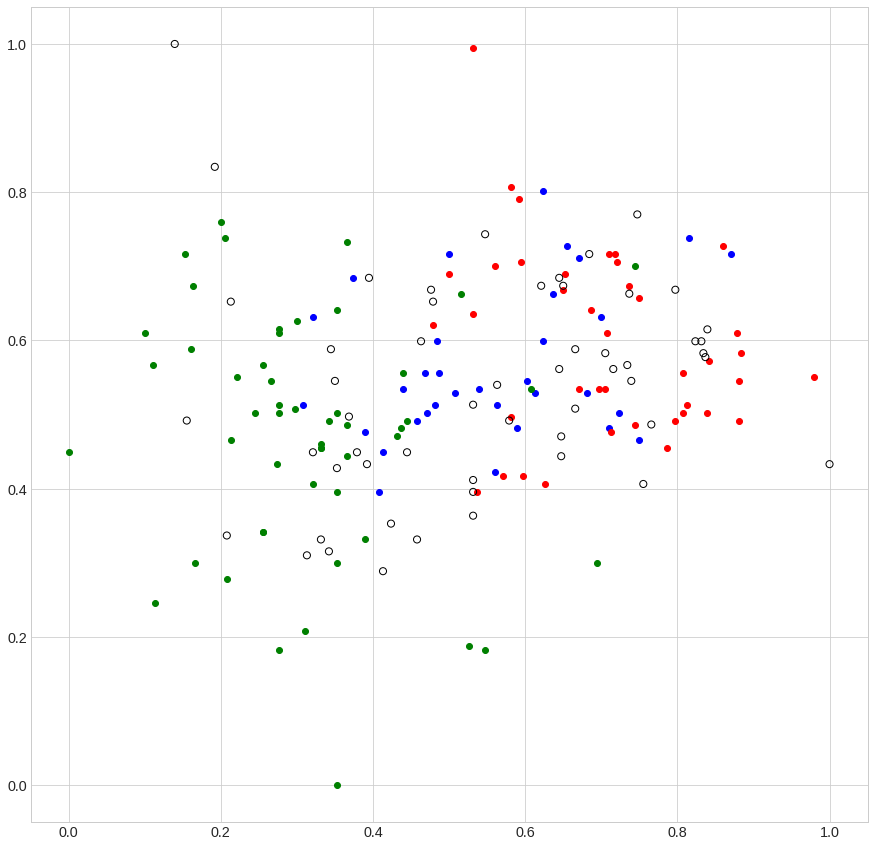

In [9]:
min_max_scaler = preprocessing.MinMaxScaler()
trim_df = df[['alcohol', 'ash']]
df_minmax = min_max_scaler.fit_transform(trim_df)

X_train, X_test, y_train, y_test = train_test_split(df_minmax, wine.target, test_size=0.3) # 70% training and 30% test

neighbors = 3
knn = KNeighborsClassifier(n_neighbors=neighbors)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(f'Accuracy for {neighbors} neighbors: {metrics.accuracy_score(y_test, y_pred)}')

neighbors = 7
knn = KNeighborsClassifier(n_neighbors=neighbors)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(f'Accuracy for {neighbors} neighbors: {metrics.accuracy_score(y_test, y_pred)}')

neighbors = 9
knn = KNeighborsClassifier(n_neighbors=neighbors)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(f'Accuracy for {neighbors} neighbors: {metrics.accuracy_score(y_test, y_pred)}')

# print(X_train)
# print(y_train)

for i in range(0, len(X_train)):
    if y_train[i] == 0:
        plt.scatter(X_train[i][0], X_train[i][1], c='r', linewidth=1)
    elif y_train[i] == 1:
        plt.scatter(X_train[i][0], X_train[i][1], c='g', linewidth=1)
    else:
        plt.scatter(X_train[i][0], X_train[i][1], c='b', linewidth=1)

for i in range(0, len(X_test)):
    plt.scatter(X_test[i][0], X_test[i][1],  s=50, facecolors='none', edgecolors='black')
    
plt.plot()

In [10]:
predicted= knn.predict([[0.35263158, 0.]])
print(predicted)

[1]


#### As we can see on above result, the prediction for the dot at y=0 is 1, since all the closest neighbors are green (the number 1 is displayed as green color on the scatter plot)

## 2. Decison tree

In [11]:
# !pip3 install graphviz
# !pip3 install pydotplus

# !sudo apt-get install graphviz

In [12]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

from sklearn.tree import export_graphviz
from io import StringIO  
from IPython.display import Image  
import pydotplus

In [13]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv("diabetes.csv", header=None, names=col_names)

pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.6883116883116883


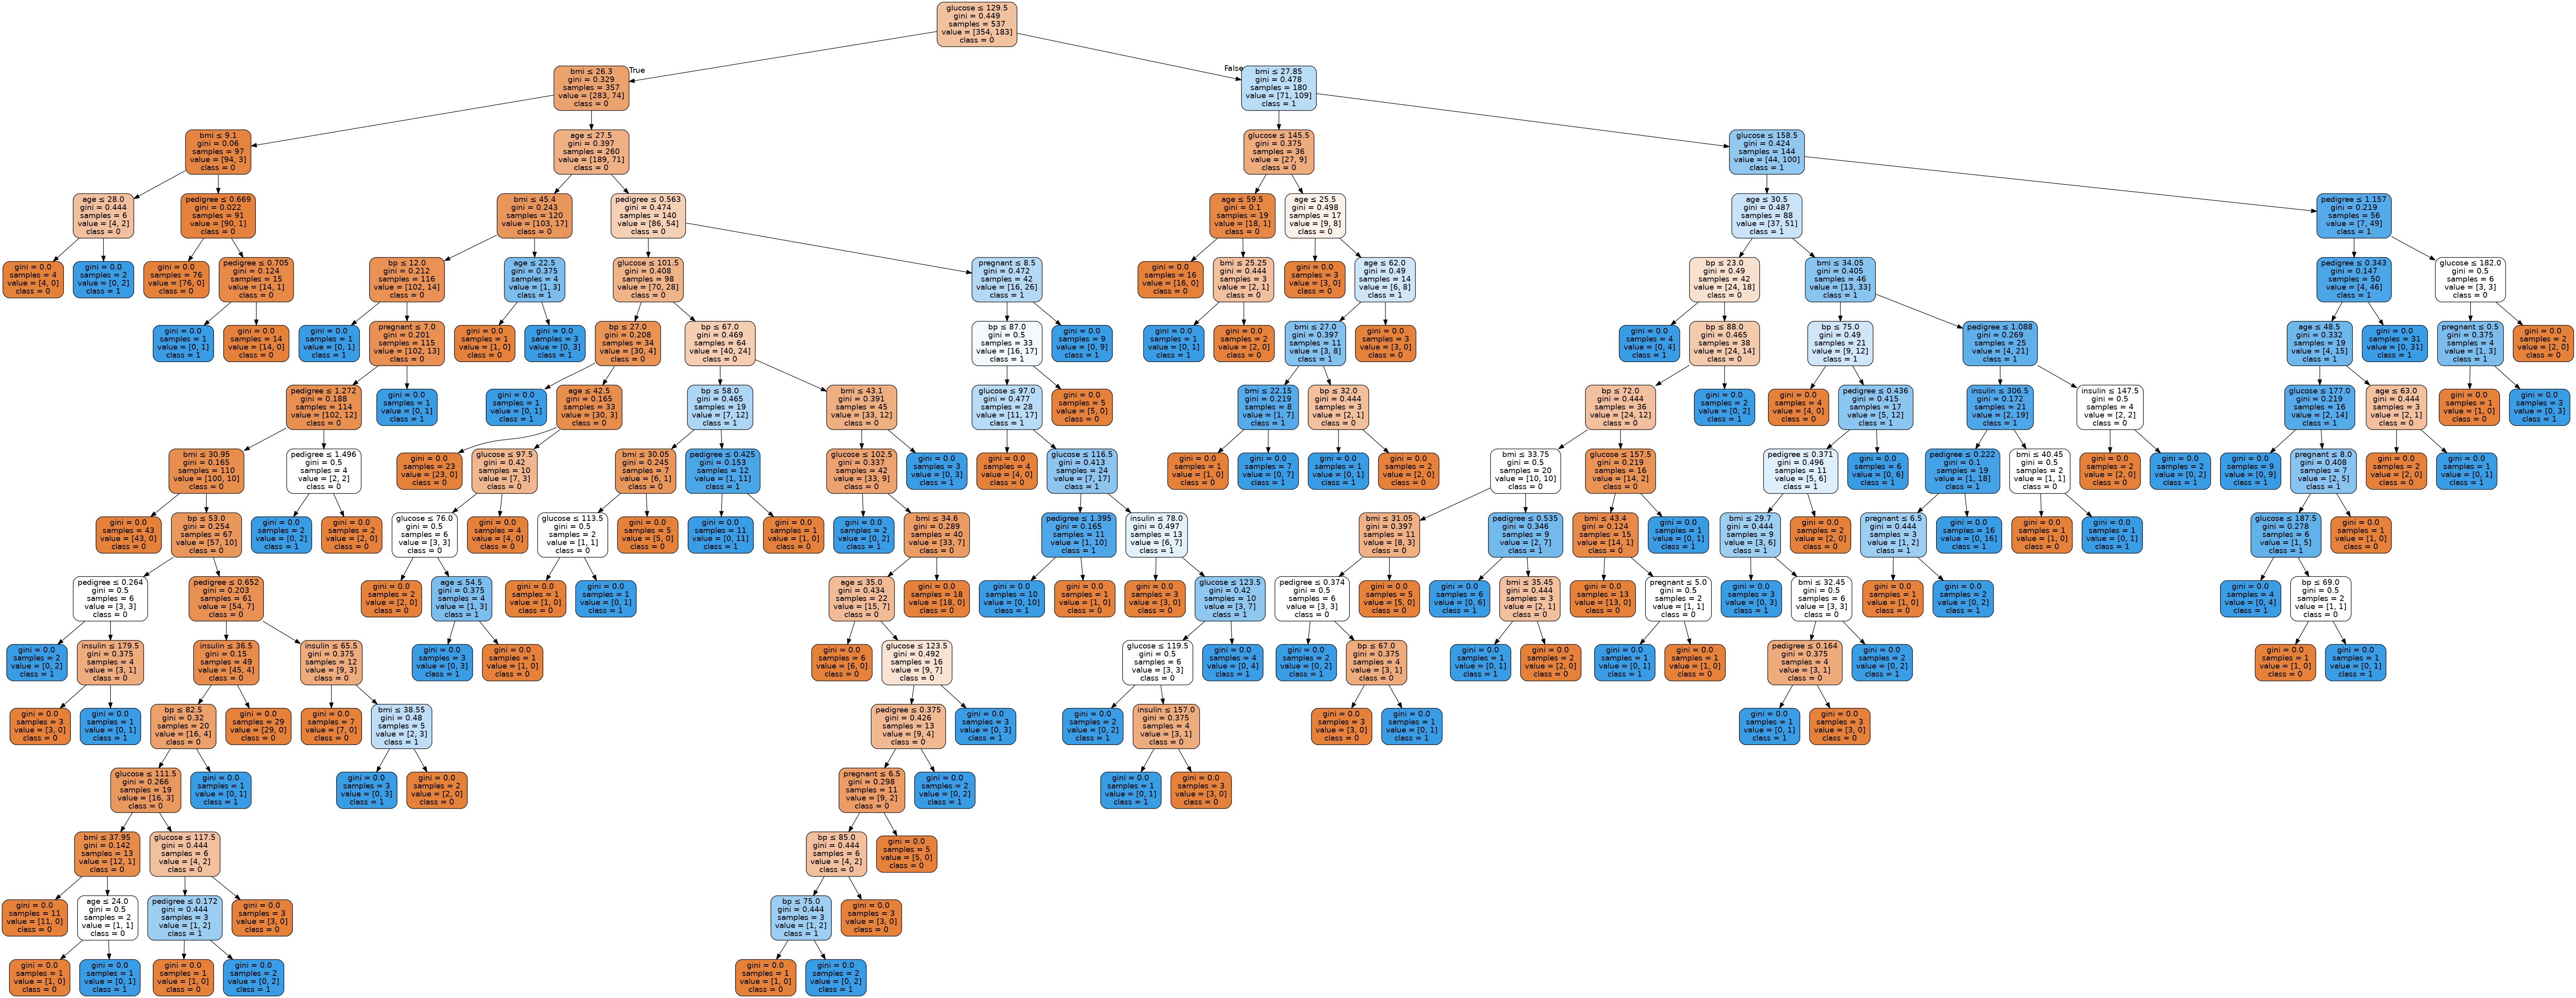

In [16]:
out_file = export_graphviz(clf,filled=True,
                rounded=True,
                special_characters=True,
                feature_names = feature_cols,
                class_names=['0','1']
               )
graph = pydotplus.graph_from_dot_data(out_file)
Image(graph.create_png())

In [17]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


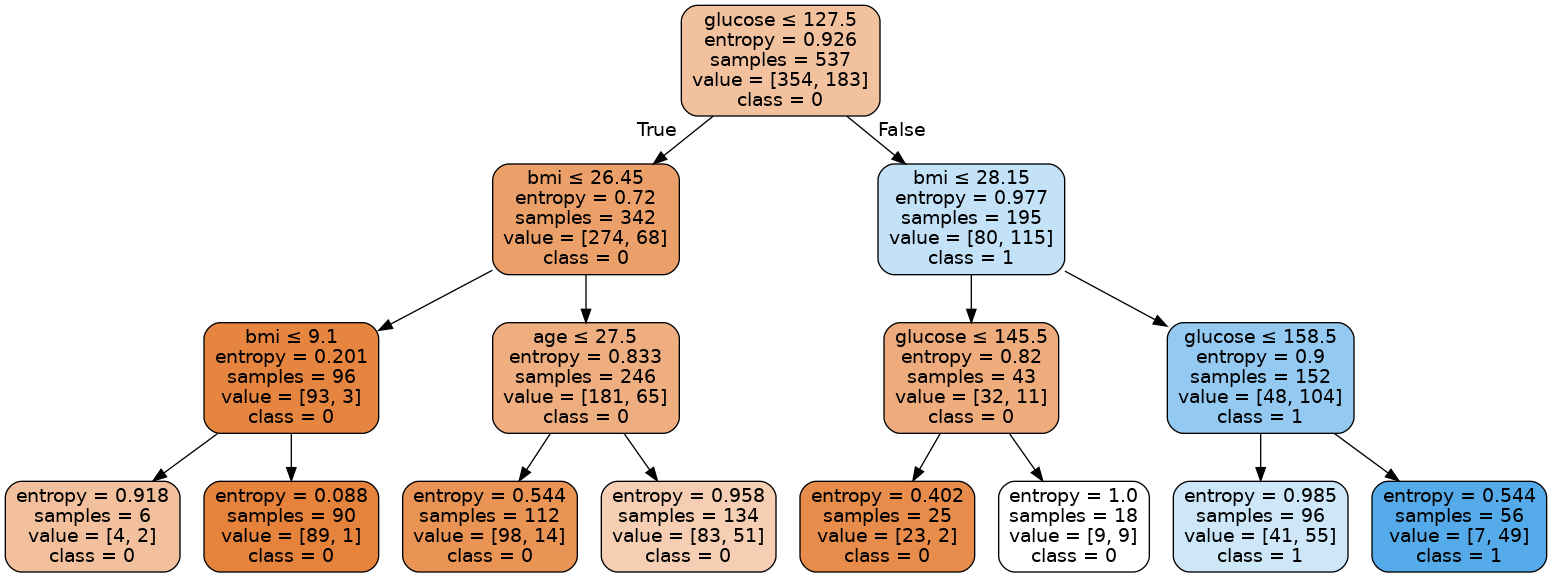

In [18]:
out_file = export_graphviz(clf,filled=True,
                rounded=True,
                special_characters=True,
                feature_names = feature_cols,
                class_names=['0','1']
               )
graph = pydotplus.graph_from_dot_data(out_file)
Image(graph.create_png())

## 3. Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns

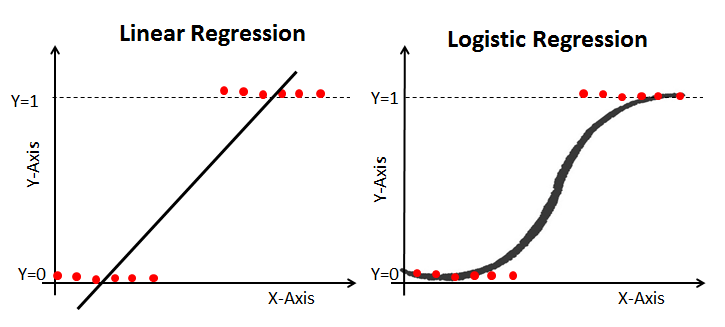

In [20]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv("diabetes.csv", header=None, names=col_names)

pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [21]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

/home/max/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[117,  13],
       [ 24,  38]])

Text(0.5, 954.4, 'Predicted label')

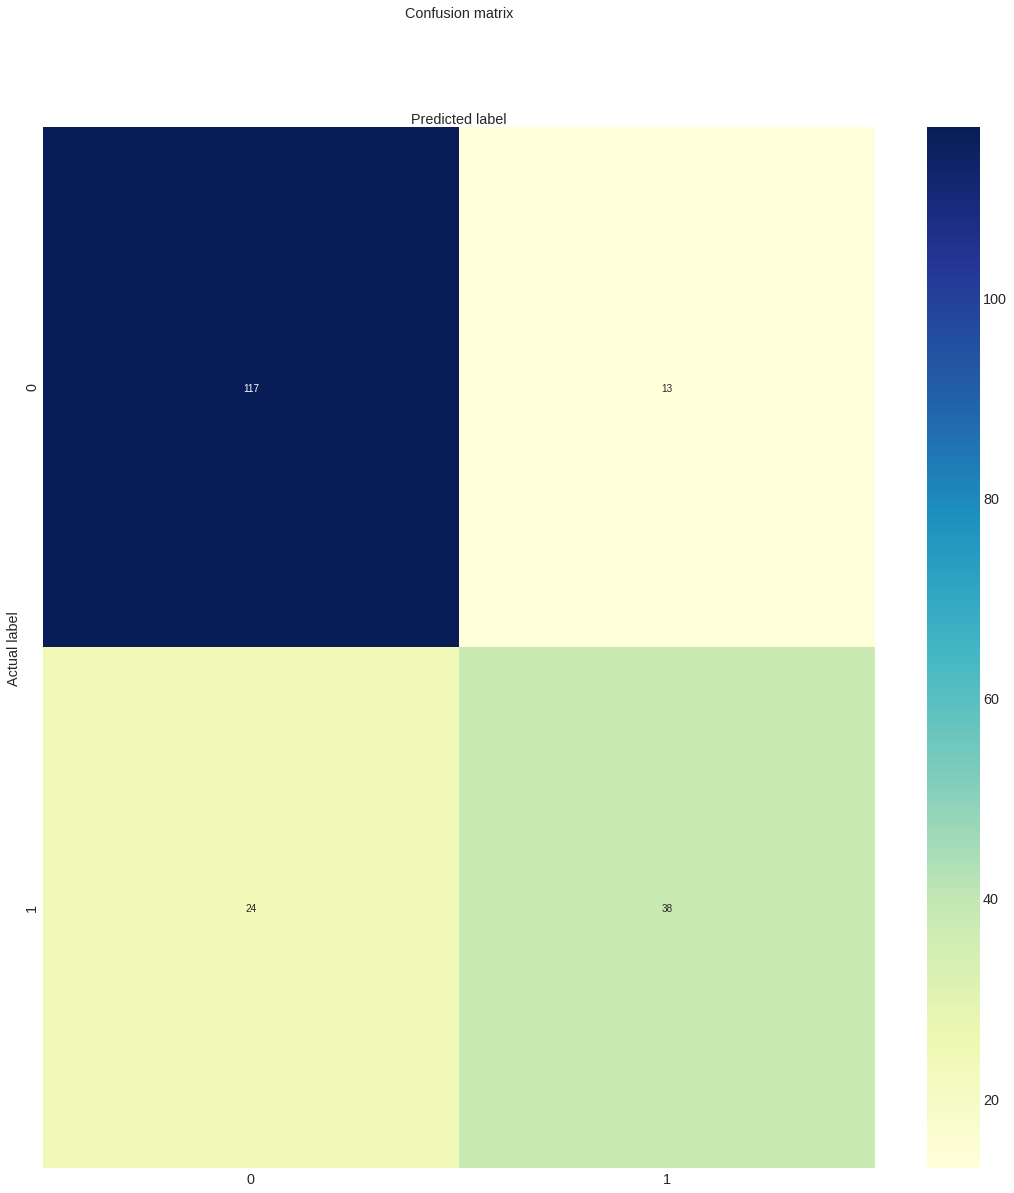

In [24]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [25]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8072916666666666
Precision: 0.7450980392156863
Recall: 0.6129032258064516


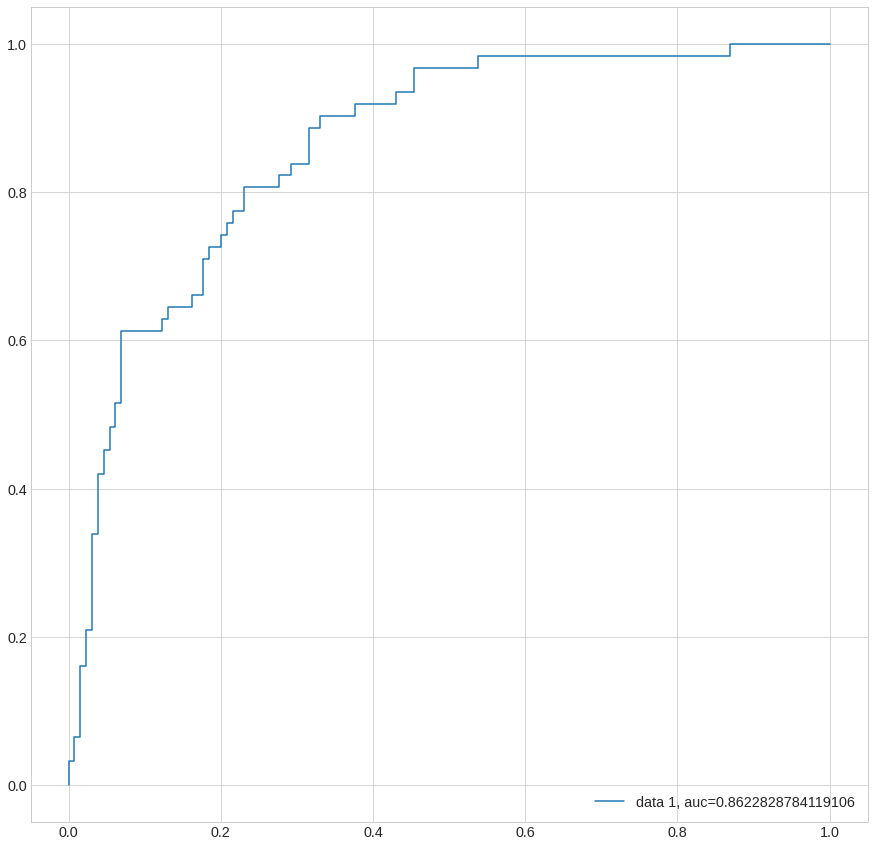

In [26]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## 4. Naive Bayes

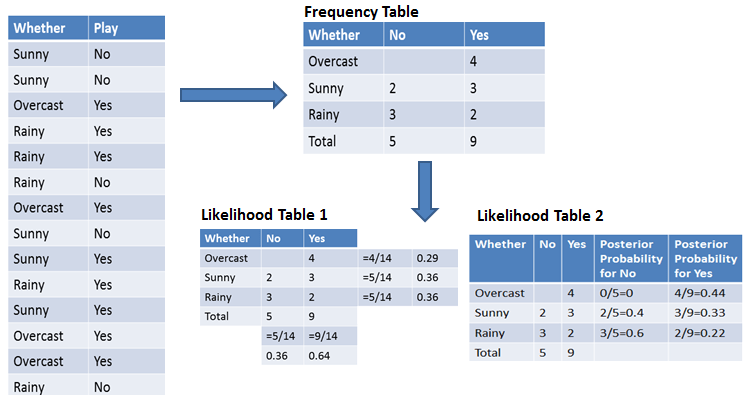

In [27]:
from sklearn.naive_bayes import GaussianNB

In [28]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv("diabetes.csv", header=None, names=col_names)
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


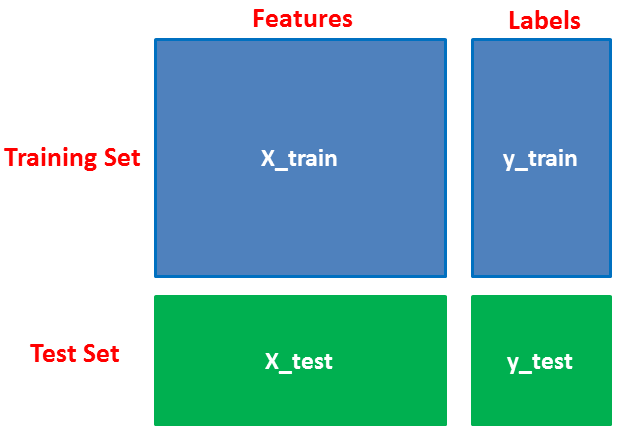

In [29]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols]
y = pima.label
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

gnb = GaussianNB()

gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

In [30]:
list_of_tuples = list(zip(y_test, y_pred)) 

results_df = pd.DataFrame(list_of_tuples,
                  columns = ['Actual', 'Predicted']) 
results_df

,Actual,Predicted
0,1,1
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
187,1,0
188,1,0
189,0,0
190,0,0


In [31]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7760416666666666


## 5. LDA (Linear Discriminant Analysis)

In [32]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [33]:
X, y = datasets.load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

lda = LinearDiscriminantAnalysis()
y_pred = lda.fit(X_train, y_train).predict(X_test)

print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 75 points : 3


In [34]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.94      0.97      0.95        30
           2       0.96      0.92      0.94        24

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75



## 6. SVM (Support Vector Machine)

In [35]:
from sklearn import svm

In [36]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols]
y = pima.label
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)


#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [37]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8020833333333334
Precision: 0.74
Recall: 0.5967741935483871


## 7. MLP (Multi Layer Perceptron)

In [38]:
from sklearn.neural_network import MLPClassifier

In [39]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols]
y = pima.label
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

mlp = MLPClassifier(random_state=1, max_iter=1500).fit(X_train, y_train)
y_pred = mlp.predict_proba(X_test)
y_pred2 = mlp.predict(X_test)

mlp.score(X_test, y_test)

0.7395833333333334